In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# RESTAURANT

In [4]:
df_res = pd.read_csv('data/restaurants.csv')
df_res.head()

,id,name,rating,rating_count,address
0,1,The Little Door,4.5,345,"62 Trương Quyền, Phường 6, Quận 3, Thành phố H..."
1,2,Côn Sơn Restaurant & Lounge,4.3,114,"80-84 Trần Quốc Thảo, Võ Thị Sáu, Quận 3, Thàn..."
2,3,Nhà Hàng Cơm Tấm Kim Kê,4.7,3,"60 Trường Sơn, Phường 2, Tân Bình, Thành phố H..."
3,4,Nhà Hàng Chả Cá Lã Vọng,4.4,17,"53 Đ. Lam Sơn, Phường 2, Tân Bình, Thành phố H..."
4,5,Com Ngon & Cong Chua Pot Restaurant,3.9,15,"Parkson Tân Bình, 60A, Trường Sơn, Quận Tân Bì..."


In [5]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            120 non-null    int64  
 1   name          120 non-null    object 
 2   rating        120 non-null    float64
 3   rating_count  120 non-null    int64  
 4   address       120 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ KB


In [6]:
df_res['address'][1].split(',')[-2]

' Quận 3'

In [7]:
# split address to get district
df_res['district'] = df_res['address'].str.split(',').str[-2]

In [8]:
df_res.head()

,id,name,rating,rating_count,address,district
0,1,The Little Door,4.5,345,"62 Trương Quyền, Phường 6, Quận 3, Thành phố H...",Quận 3
1,2,Côn Sơn Restaurant & Lounge,4.3,114,"80-84 Trần Quốc Thảo, Võ Thị Sáu, Quận 3, Thàn...",Quận 3
2,3,Nhà Hàng Cơm Tấm Kim Kê,4.7,3,"60 Trường Sơn, Phường 2, Tân Bình, Thành phố H...",Tân Bình
3,4,Nhà Hàng Chả Cá Lã Vọng,4.4,17,"53 Đ. Lam Sơn, Phường 2, Tân Bình, Thành phố H...",Tân Bình
4,5,Com Ngon & Cong Chua Pot Restaurant,3.9,15,"Parkson Tân Bình, 60A, Trường Sơn, Quận Tân Bì...",Tân Bình


In [9]:
df_res.to_csv('data/restaurants.csv', index=False)

In [56]:
df_res.sort_values(by='rating_count', ascending=False).head(10)

,id,name,rating,rating_count,address,district
98,148,Nhà Hàng Bê Vàng - Hải Sản Tươi Sống,4.3,973,"263 Đ. An D. Vương, Phường 3, Quận 5, Thành ph...",Quận 5
97,147,Nhà hàng Đất Sét,4.0,970,"16 Đ. Lê Hồng Phong, Phường 12, Quận 10, Thành...",Quận 10
86,103,McDonald's Tân Sơn Nhất,3.9,908,"Phòng A1, Tầng trệt, Khu vực thương mại Nhà gi...",Tân Bình
90,140,Nhà hàng Khoái,4.2,829,"16 Lê Quý Đôn, Phường 6, Quận 3, Thành phố Hồ ...",Quận 3
99,149,Nhà Hàng Bê Vàng,3.9,798,"110 Đ. Vành Đai Trong, An Lạc A, Bình Tân, Thà...",Bình Tân
93,143,Nhà hàng Chay Bếp xanh An Duyên,4.5,787,"10 Đ. Nguyễn Tri Phương, Phường 6, Quận 5, Thà...",Quận 5
81,97,Dim Tu Tac,4.3,786,"202A Hoàng Văn Thụ, Phường 9, Phú Nhuận, Thành...",Phú Nhuận
59,68,Blue Coffee & Restaurant,4.2,735,"202 Hoàng Văn Thụ, Phường 9, Phú Nhuận, Thành ...",Phú Nhuận
61,72,Quán lẩu dê Lam Sơn,3.8,705,"31a Hồng Hà, Phường 2, Tân Bình, Thành phố Hồ ...",Tân Bình
104,154,Nhà Hàng Chay (Vegetarian Restaurant) Hoa Khai,4.3,703,"khuôn viên Nam Thành Thánh Thất, 124 Đ. Nguyễn...",Quận 1


# REVIEWS

In [8]:
df_reviews = pd.read_csv('data/reviews.csv')
df_reviews.head(10)

,res_id,review,rating
0,1,It is such a nice and romantic restaurant for ...,5
1,1,Food is marvelous.\nWe ordered the French onio...,4
2,1,One of those fine dining experience I have in ...,5
3,1,I have the 4 course set is around HKD 2XX per ...,5
4,1,"Fav place in sgn\nAmazing food, luxurious atmo...",5
5,1,A small yet very interesting European fusion t...,5
6,1,We really wanted to eat beef steak. In the ne...,5
7,1,Went there for lunch and had a very nice time ...,5
8,1,Nice cafe with good spaghetti.\n\nLove the tru...,4
9,1,"The place is quite romantic, suitable for coup...",5


In [9]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11208 entries, 0 to 11207
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   res_id  11208 non-null  int64 
 1   review  9308 non-null   object
 2   rating  11208 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 262.8+ KB


In [10]:
# Concatenate all reviews into one string
reviews = ' '.join(df_reviews.dropna()['review']) 

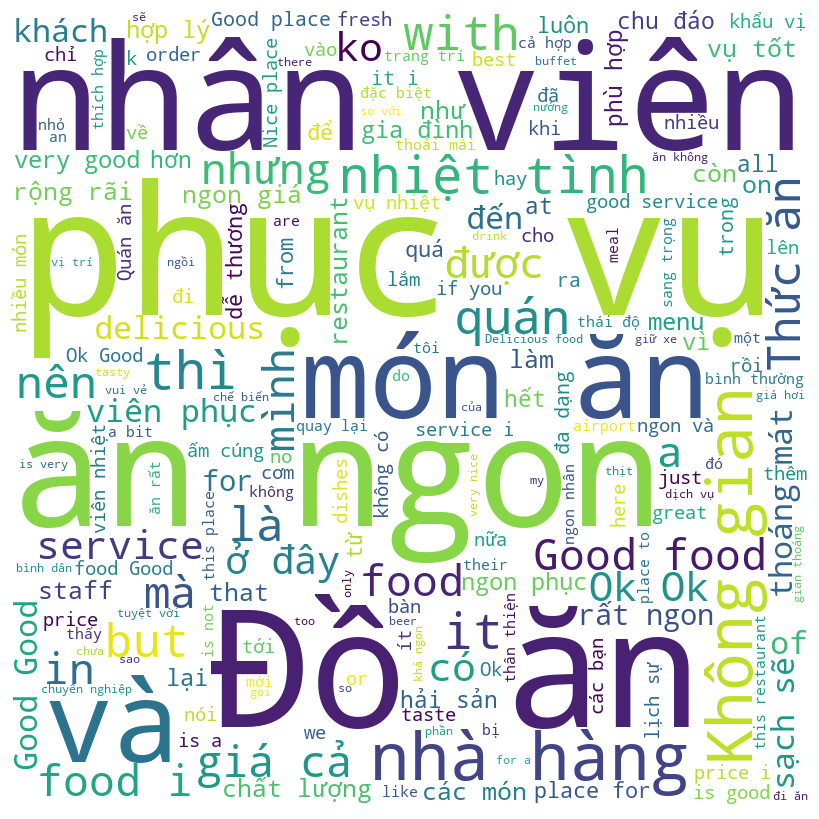

In [11]:
# creat wordcloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      max_words=200,
                      contour_color='steelblue',
                      contour_width=3,
                      stopwords=['the', 'and', 'was', 'were', 'they']) \
                .generate(reviews)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


=> The five most important aspects considered are food, staff, facility, price, and location

In [12]:
# tokenize the reviews text into individual words
tokens = word_tokenize(reviews)

# generate the frequency distribution of each word in the text
fdist = FreqDist(tokens)

# display the 10 most common words and their frequency
top_words = fdist.most_common(30)
for word, freq in top_words:
    print(f'{word}: {freq}')

.: 10966
,: 9768
ăn: 3591
and: 2488
the: 2473
ngon: 2341
is: 1745
food: 1606
không: 1575
món: 1517
vụ: 1463
có: 1345
a: 1344
to: 1342
!: 1319
và: 1211
good: 1182
phục: 1077
for: 1052
rất: 1047
Good: 1021
viên: 1016
I: 962
hàng: 933
The: 901
of: 890
was: 887
là: 883
thì: 803
gian: 791


In [13]:
# add review id column
df_reviews['review_id'] = df_reviews['res_id'].astype(str)+ '.' + (df_reviews.index + 1).astype(str)
#move id column to the front
cols = df_reviews.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_reviews = df_reviews[cols]
df_reviews.head()

,review_id,res_id,review,rating
0,1.1,1,It is such a nice and romantic restaurant for ...,5
1,1.2,1,Food is marvelous.\nWe ordered the French onio...,4
2,1.3,1,One of those fine dining experience I have in ...,5
3,1.4,1,I have the 4 course set is around HKD 2XX per ...,5
4,1.5,1,"Fav place in sgn\nAmazing food, luxurious atmo...",5


In [15]:
cols = ['review_id', 'res_id', 'review', 'rating']
df_reviews = df_reviews[cols]
df_reviews.head()

,review_id,res_id,review,rating
0,1.1,1,It is such a nice and romantic restaurant for ...,5
1,1.2,1,Food is marvelous.\nWe ordered the French onio...,4
2,1.3,1,One of those fine dining experience I have in ...,5
3,1.4,1,I have the 4 course set is around HKD 2XX per ...,5
4,1.5,1,"Fav place in sgn\nAmazing food, luxurious atmo...",5


In [17]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24222 entries, 0 to 11207
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  24222 non-null  object
 1   res_id     24222 non-null  int64 
 2   review     22322 non-null  object
 3   rating     24222 non-null  int64 
 4   sentences  22322 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [24]:
df_reviews.to_csv('data/sentences.csv', index=False)